In [28]:
#Importing the packages 
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

 # DATA PREPROCESSING 

In [29]:
# Load the dataset
df = pd.read_csv("data//adultincome.csv")

In [7]:
# Explore the data
print(df.shape)

(32561, 15)


In [13]:
# Identification of data types of variables
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
# head
print(df.head())

   age workclass  fnlwgt education  education.num marital.status  \
0   17   Private  148522      11th              7  Never-married   
1   17   Private   93235      12th              8  Never-married   
2   17   Private  184924       9th              5  Never-married   
3   17   Private  116626      11th              7  Never-married   
4   17   Private  209949      11th              7  Never-married   

          occupation relationship   race     sex  capital.gain  capital.loss  \
0      Other-service    Own-child  White    Male             0          1721   
1      Other-service    Own-child  White  Female             0          1721   
2  Handlers-cleaners    Own-child  White    Male             0          1719   
3  Handlers-cleaners    Own-child  White    Male             0          1719   
4              Sales    Own-child  White  Female             0          1602   

   hours.per.week native.country income  
0              15  United-States  <=50K  
1              25  United-

In [9]:
#statistical description
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [10]:
# income distribution
print(df.groupby('income').size())

income
<=50K    24720
>50K      7841
dtype: int64


# DATA PREPARATION & EXPLORATORY DATA ANALYSIS

In [30]:
# Check for missing values 
df.isnull()

# Since the ? is not recognisable, need to make a list and transform missing values to NaN
missing_value = ["?"]
df = pd.read_csv('data//adultincome.csv', na_values = missing_value)

# View data again
print(df)

# View the sum of null values
df.isnull().sum()

       age    workclass  fnlwgt education  education.num      marital.status  \
0       17      Private  148522      11th              7       Never-married   
1       17      Private   93235      12th              8       Never-married   
2       17      Private  184924       9th              5       Never-married   
3       17      Private  116626      11th              7       Never-married   
4       17      Private  209949      11th              7       Never-married   
...    ...          ...     ...       ...            ...                 ...   
32556   90          NaN  175444   7th-8th              4           Separated   
32557   90  Federal-gov  195433   HS-grad              9  Married-civ-spouse   
32558   90      Private   47929   HS-grad              9  Married-civ-spouse   
32559   90          NaN  313986   HS-grad              9  Married-civ-spouse   
32560   90      Private  313749   HS-grad              9             Widowed   

              occupation   relationship

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [31]:
# Rename some of the columns to get rid of fullstops
df = df.rename(columns={'education.num': 'education_number', 'marital.status': 'marital', 'capital.gain': 'capitalgain', 'capital.loss': 'capitalloss', 'hours.per.week': 'hours', 'native.country': 'country'})

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_number',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hours', 'country', 'income'],
      dtype='object')

In [11]:
# Determine how many adults >50K and <=50K 
# Check the outlier fraction
Exceeds = df[df['income'] == '>50K']
Not_Exceed = df[df['income'] == '<=50K']

outlier_fraction = len(Exceeds)/float(len(Not_Exceed))
print(outlier_fraction)

print('Number of adults whose income exceeds 50K/year: {}' .format(len(df[df['income'] == '>50K'])))
print('Number of adults whose income does not exceed 50K/year: {}' .format(len(df[df['income'] == '<=50K'])))

0.31719255663430423
Number of adults whose income exceeds 50K/year: 7841
Number of adults whose income does not exceed 50K/year: 24720


In [17]:
# Non-Graphical Univariate Analysis
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [22]:
# Get list of number of unique values
df['income'].nunique()

2

In [21]:
# Unique values in the column
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [28]:
# Filtering based on conditions
df[(df['workclass'] == "Private")]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,17,Private,148522,11th,7,Never-married,Other-service,Own-child,White,Male,0,1721,15,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,Other-service,Own-child,White,Female,0,1721,25,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,Handlers-cleaners,Own-child,White,Male,0,1719,15,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,1719,18,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,Sales,Own-child,White,Female,0,1602,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,90,Private,226968,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
32553,90,Private,206667,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
32554,90,Private,52386,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
32558,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
# Filtering based on two conditions using AND operator
df[(df['workclass'] == "Private") & (df['marital'] == "Never-married")]

,age,workclass,fnlwgt,education,education,marital,occupation,relationship,race,sex,capitalgain,capitalloss,hours,country,income
0,17,Private,148522,11th,7,Never-married,Other-service,Own-child,White,Male,0,1721,15,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,Other-service,Own-child,White,Female,0,1721,25,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,Handlers-cleaners,Own-child,White,Male,0,1719,15,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,1719,18,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,Sales,Own-child,White,Female,0,1602,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32540,90,Private,87285,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K
32541,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
32548,90,Private,313749,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
32549,90,Private,115306,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K


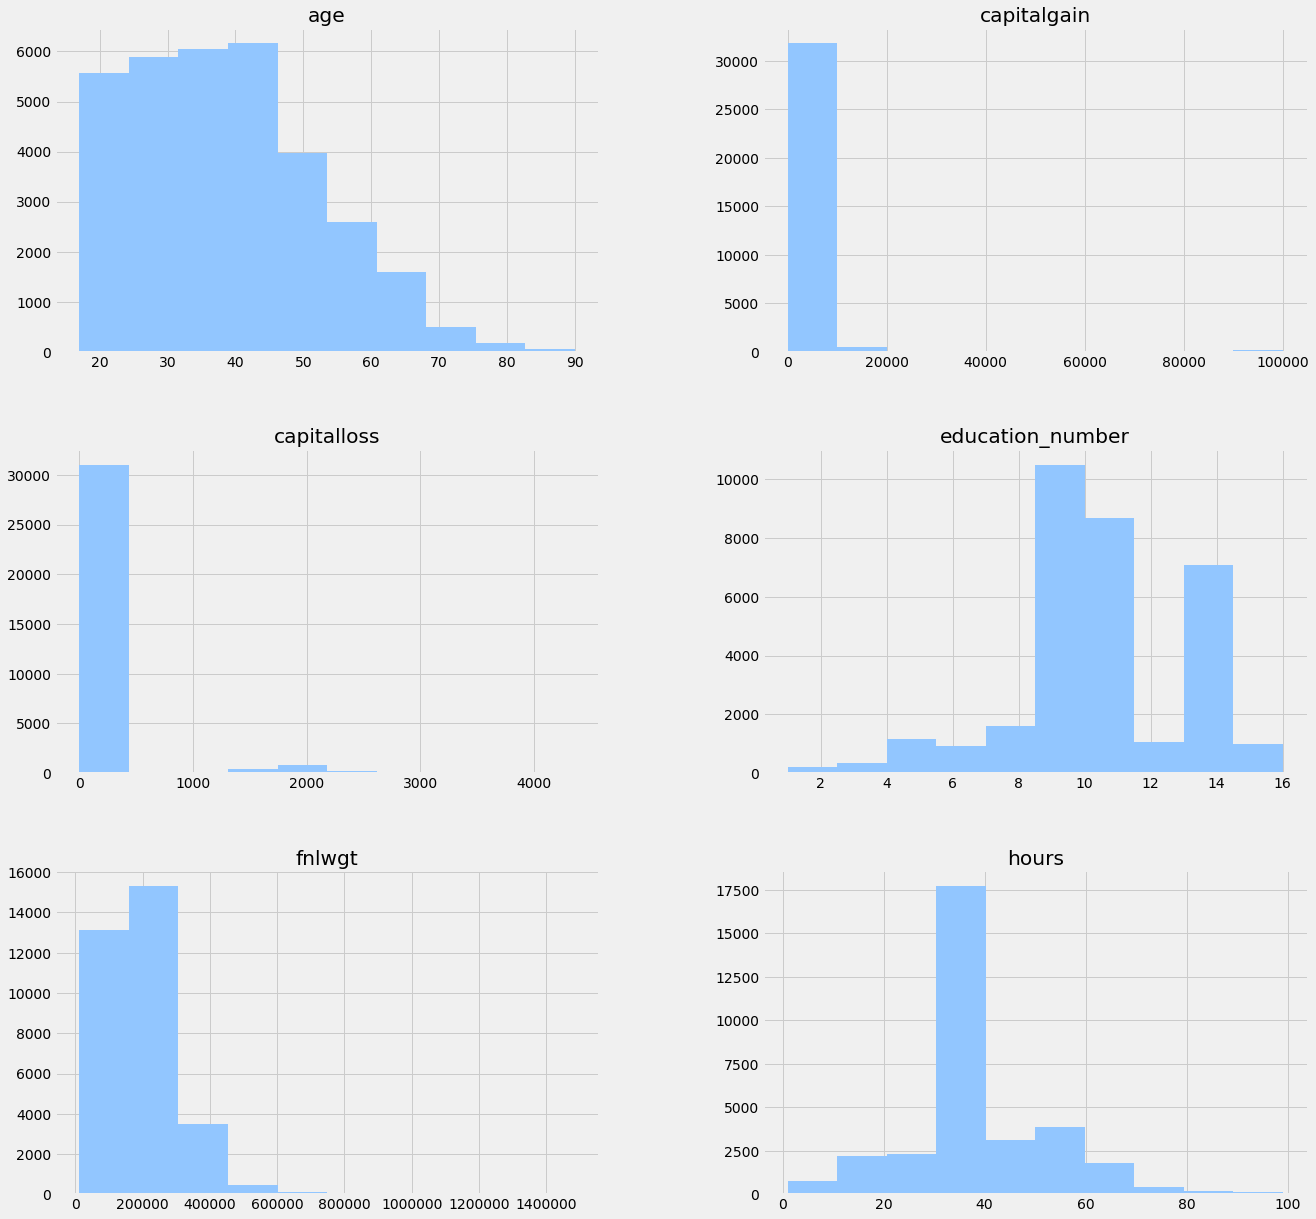

In [38]:
# Plot histograms for each numeric variable
df.hist(figsize = (20, 20))
plt.show()

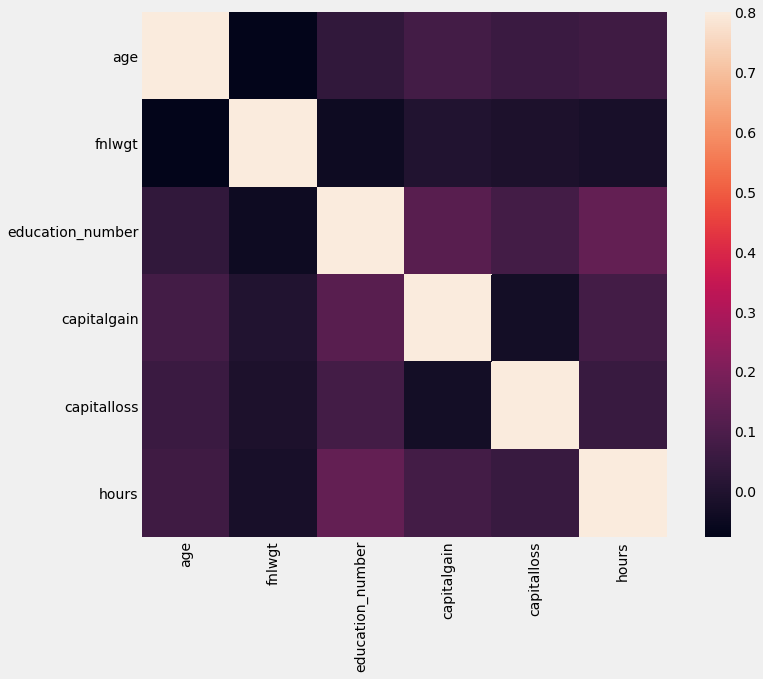

In [39]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

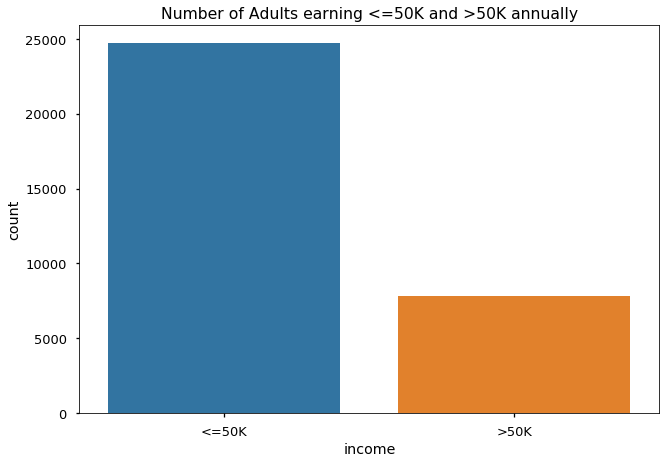

In [34]:
# Exploratory Data Analysis - Numeric Variables
#1. Number of adults earning <=50K and >50K (0, 1)
#(plt.style.available) -> to see available styles for plots
plt.style.use("seaborn-talk")
sns.countplot(df['income'])
plt.title('Number of Adults earning <=50K and >50K annually')
plt.show()

Text(0.5, 1.0, 'Adult Income based on education number')

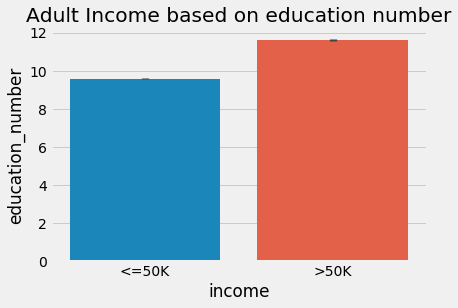

In [26]:
#2. adult income based on education.num
plt.style.use("fivethirtyeight")
sns.barplot(x = "income", y = "education_number", data = df)
plt.title("Adult Income based on education number")

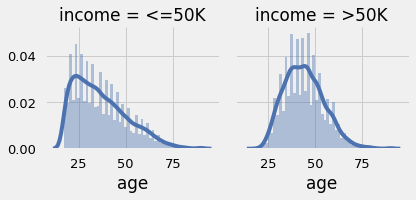

In [54]:
#3. Distribution of age when income = 0 and income = 1 respectively.
plt.style.use("seaborn-deep")
age_income = sns.FacetGrid(df, col='income')
age_income = age_income.map(sns.distplot, "age")
plt.show()

Text(0.5, 1.0, 'Adult Income based on hours per week')

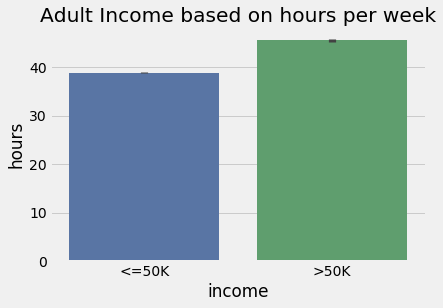

In [27]:
#4. adult income based on hours.per.week
plt.style.use("seaborn-deep")
sns.barplot(x = "income", y = "hours", data = df)
plt.title("Adult Income based on hours per week")

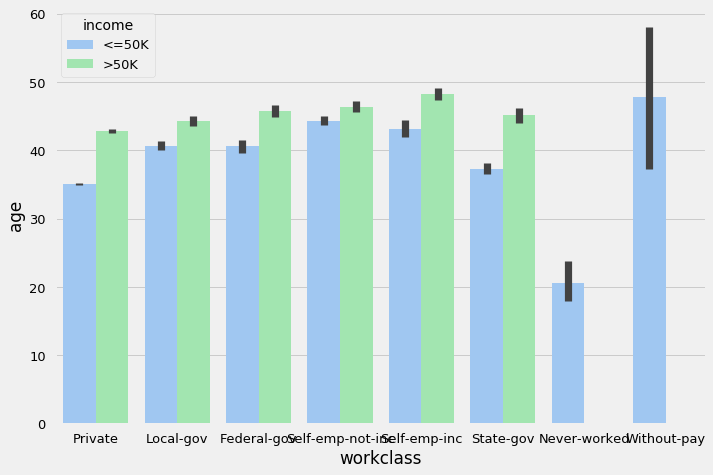

In [63]:
# Exploratory Data Analysis - Categorical Variables
#1. Explore workclass vs income and age
plt.style.use("seaborn-pastel")
ax = sns.barplot(x="workclass", y="age", hue="income", data=df)

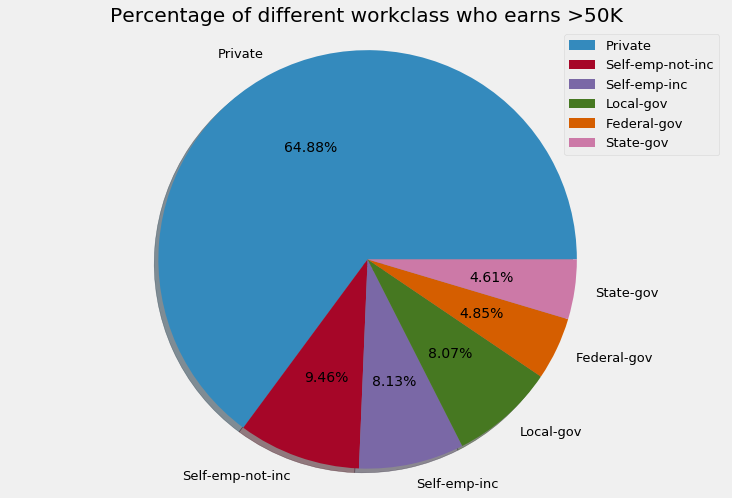

In [72]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# Percentage of adults of different workclass who earns >50K
plt.title("Percentage of different workclass who earns >50K")
plt.style.use("seaborn-dark-palette")
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

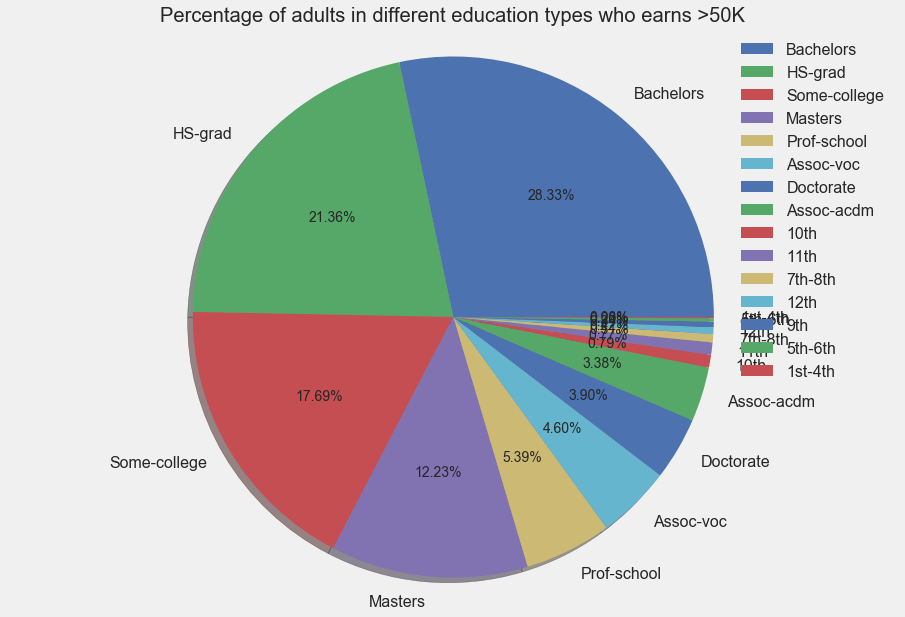

In [88]:
# Creating Pandas Series for the education types whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['education']]
education_types = df_['education'].value_counts()
labels = list(education_types.index)
aggregate = list(education_types)

# Percentage of adults from different education types who earns >50K
plt.title("Percentage of adults in different education types who earns >50K")
plt.style.use("seaborn-deep")
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

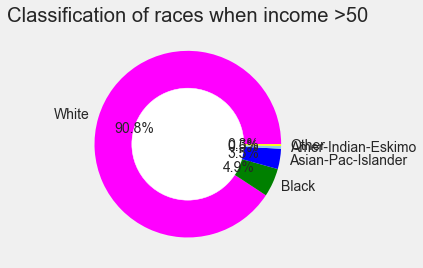

In [43]:
# Creating Pandas Series for the races whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['race']]
race_types = df_['race'].value_counts()
labels = list(race_types.index)
aggregate = list(race_types)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')
# Give color names
plt.style.use("fivethirtyeight")
plt.title("Classification of races when income >50")
plt.pie(aggregate, labels=labels, colors=['magenta','green','blue','skyblue','yellow'], autopct="%.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


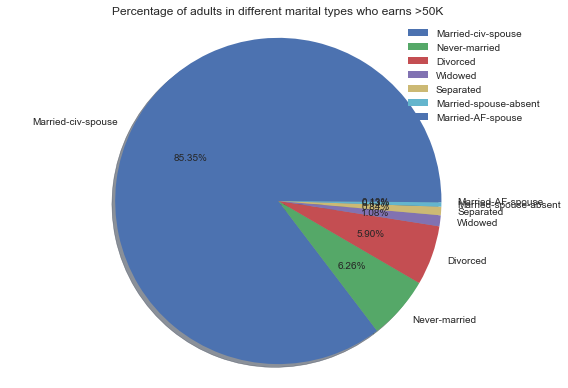

In [46]:
# Creating Pandas Series for the marital types whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['marital']]
marital_types = df_['marital'].value_counts()
labels = list(marital_types.index)
aggregate = list(marital_types)

# Percentage of adults from different marital types who earns >50K
plt.title("Percentage of adults in different marital types who earns >50K")
plt.style.use("ggplot")
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()


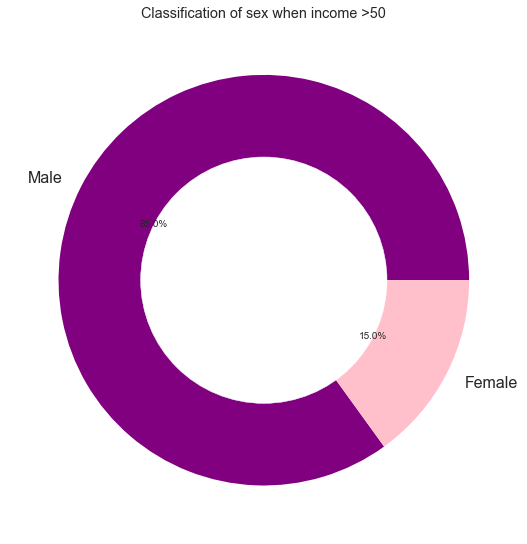

In [133]:
# Creating Pandas Series for the sex whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['sex']]
sex_types = df_['sex'].value_counts()
labels = list(sex_types.index)
aggregate = list(sex_types)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')
# Give color names
plt.style.use("seaborn-deep")
plt.title("Classification of sex when income >50")
plt.pie(aggregate, labels=labels, colors=['purple','pink'], autopct="%.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [32]:
# Group adults based on native country and income
df_ = df[df['country'] != 'NaN']
high_native = df_.loc[df['income'] == '>50K',['country']].groupby('country').size()
low_native = df_.loc[df['income'] == '<=50K',['country']].groupby('country').size()

high_index = list(high_native.index)
low_index = list(low_native.index)

#Check both the index
print(high_index)
print(len(high_index))
print(low_index)
print(len(low_index))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
39
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [33]:
# Check which countries not in high_index list
[country for country in low_index if country not in high_index]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [34]:
# Making DataFrames of the Data
high_df = pd.DataFrame({'Countries' : high_index, '>50K' : list(high_native) })
low_df = pd.DataFrame({'Countries' : low_index, '<=50K' : list(low_native) })

# Adding the entries of the missing countries
high_df.loc[40] = 'Holand-Netherlands', 0
low_df.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

high_df

,Countries,>50K
0,Cambodia,7
1,Canada,39
2,China,20
3,Columbia,2
4,Cuba,25
5,Dominican-Republic,2
6,Ecuador,4
7,El-Salvador,9
8,England,30
9,France,12


In [35]:
# Merging both the Data Frames to be used for plotting
final_df = pd.merge(low_df, high_df, on = 'Countries')

final_df

,Countries,<=50K,>50K
0,Cambodia,12,7
1,Canada,82,39
2,China,55,20
3,Columbia,57,2
4,Cuba,70,25
5,Dominican-Republic,68,2
6,Ecuador,24,4
7,El-Salvador,97,9
8,England,60,30
9,France,17,12


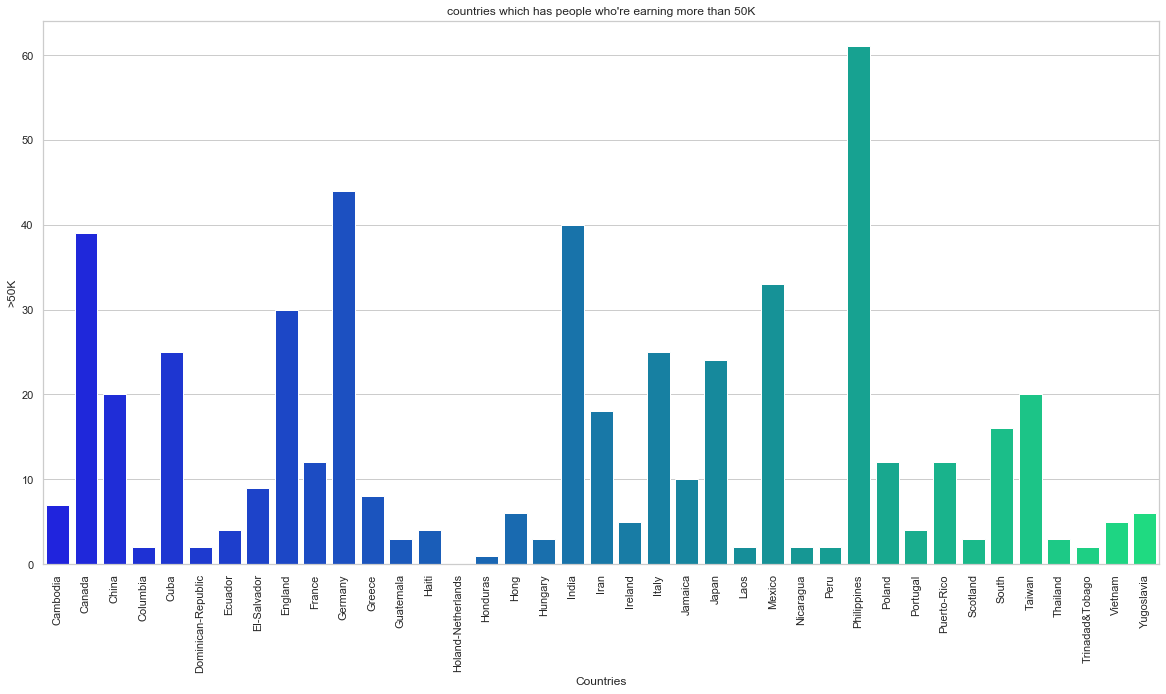

In [36]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity
final_df = final_df.drop([37])

# Adults in diff countries who make more than 50K a year excluding US

more1 = sns.barplot(x = final_df['Countries'], y = final_df['>50K'], data = final_df, palette = 'winter')
more1.title.set_text("countries which has people who're earning more than 50K")

plt.setp(more1.get_xticklabels(), rotation = 90);

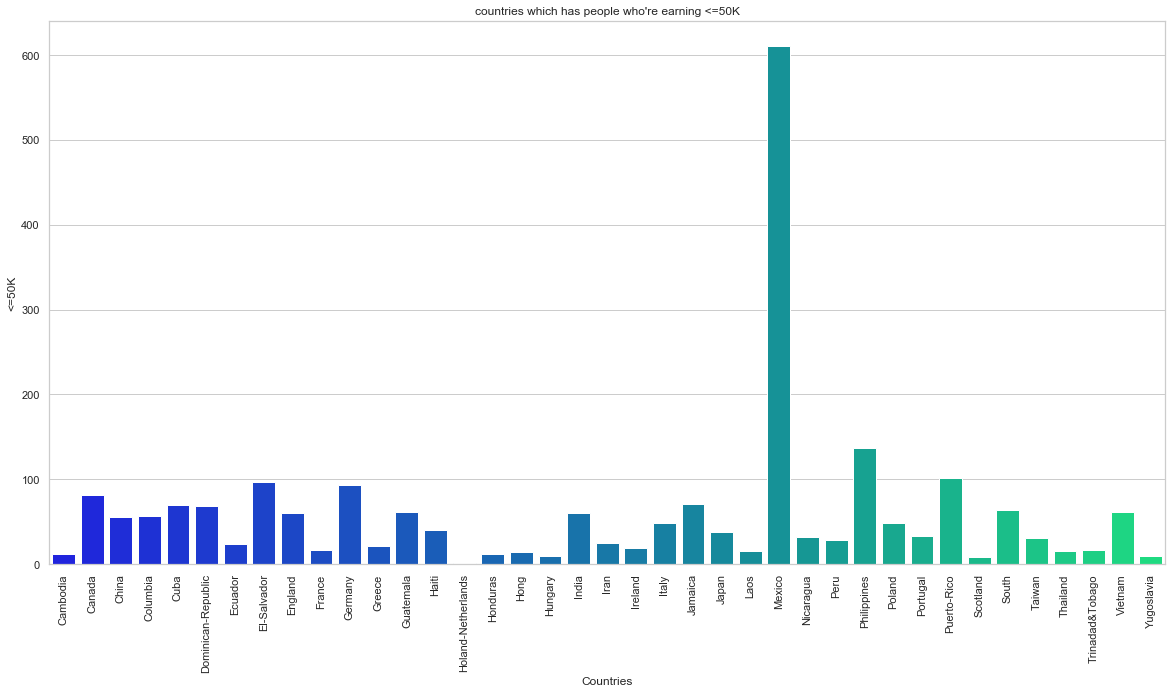

In [37]:
# Adults in diff countries who make less than or equal to 50K a year excluding US

less1 = sns.barplot(x = final_df['Countries'], y = final_df['<=50K'], data = final_df, palette = 'winter')
less1.title.set_text("countries which has people who're earning <=50K")

plt.setp(less1.get_xticklabels(), rotation = 90);

# FEATURE ENGINEERING

In [8]:
#1. drop unwanted columns
del df['relationship']
del df['education']
del df['workclass']
del df['fnlwgt']

In [9]:
#1. Assign 0 and 1 to <=50K and >50K respectively
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['income'].unique()
# Check
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [10]:
df.isnull().sum()

age                    0
education_number       0
marital                0
occupation          1843
race                   0
sex                    0
capitalgain            0
capitalloss            0
hours                  0
country              583
income                 0
dtype: int64

In [11]:
# imputation with mode because categorical variables.
for i in ['occupation','country']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
df.head(15)

,age,education_number,marital,occupation,race,sex,capitalgain,capitalloss,hours,country,income
0,17,7,Never-married,Other-service,White,Male,0,1721,15,United-States,0
1,17,8,Never-married,Other-service,White,Female,0,1721,25,United-States,0
2,17,5,Never-married,Handlers-cleaners,White,Male,0,1719,15,United-States,0
3,17,7,Never-married,Handlers-cleaners,White,Male,0,1719,18,United-States,0
4,17,7,Never-married,Sales,White,Female,0,1602,12,United-States,0
5,17,6,Never-married,Other-service,White,Female,0,1602,18,United-States,0
6,17,6,Never-married,Protective-serv,White,Female,0,1602,40,United-States,0
7,17,7,Never-married,Adm-clerical,Black,Female,0,1602,40,United-States,0
8,17,6,Never-married,Other-service,White,Female,0,1602,12,United-States,0
9,17,6,Never-married,Other-service,White,Female,0,1602,10,United-States,0


In [13]:
# count the number of NaN values in each column
print(df.isnull().sum())

age                 0
education_number    0
marital             0
occupation          0
race                0
sex                 0
capitalgain         0
capitalloss         0
hours               0
country             0
income              0
dtype: int64


In [14]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()
df.tail()

,age,education_number,marital,occupation,race,sex,capitalgain,capitalloss,hours,country,income
32556,90,4,5,9,4,0,0,0,15,38,0
32557,90,9,2,2,4,1,0,0,30,38,0
32558,90,9,2,6,4,1,0,0,40,38,0
32559,90,9,2,9,4,1,0,0,40,38,1
32560,90,9,6,0,4,0,0,0,25,38,0


In [52]:
df.dtypes

age                 int64
education_number    int64
marital             int32
occupation          int32
race                int32
sex                 int32
capitalgain         int64
capitalloss         int64
hours               int64
country             int32
income              int32
dtype: object

In [65]:
np.any(np.isnan(df))

False

In [64]:
np.any(np.isfinite(df))

True

In [63]:
np.where(df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

# MODELLING

In [15]:
#Split-out test dataset
array = df.values
X = array[:,0:10] #X refers to the 9 attributes, start at 0, total 10 - index position
Y = array[:,10] #Y refers to the results/label
seed = 7 #initiate a random number into the algorithm
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = seed)

#^ 4 variables calling the methods using model selection 

In [16]:
#Test options and evaluation metric
seed = 7
scoring = 'accuracy'

LR: 0.794879 (0.006861)
LDA: 0.811386 (0.006378)
KNN: 0.837032 (0.007105)
CART: 0.818028 (0.005482)
RCART: 0.846015 (0.006111)
NB: 0.797681 (0.007458)
SVM: 0.816876 (0.010438)


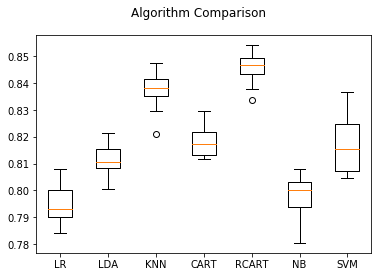

In [17]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RCART', RandomForestClassifier(n_estimators=100, oob_score = True)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:	
    kfold = model_selection.KFold(n_splits=10, random_state=seed)	
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)       
    results.append(cv_results)	
    names.append(name)	
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())	
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
    


In [41]:
# Results for Logistic Regression Model
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.7988638108398587

Confusion matrix:
[[4675  255]
 [1055  528]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4930
           1       0.67      0.33      0.45      1583

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



In [36]:
# Results for Linear Discriminant Analysis Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.8100721633655765

Confusion matrix:
[[4650  280]
 [ 957  626]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4930
           1       0.69      0.40      0.50      1583

    accuracy                           0.81      6513
   macro avg       0.76      0.67      0.69      6513
weighted avg       0.80      0.81      0.79      6513



In [38]:
# Results for KNeighbours Classifier model:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.8427759864885613

Confusion matrix:
[[4476  454]
 [ 570 1013]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4930
           1       0.69      0.64      0.66      1583

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513



In [39]:
# Results for Decision Tree Classifier model:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.8159066482419776

Confusion matrix:
[[4367  563]
 [ 636  947]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4930
           1       0.63      0.60      0.61      1583

    accuracy                           0.82      6513
   macro avg       0.75      0.74      0.75      6513
weighted avg       0.81      0.82      0.81      6513



In [19]:
# Results for the best model; Random Forest Classifier model:
rcart = RandomForestClassifier(n_estimators=100, oob_score = True)
rcart.fit(X_train, Y_train)
predictions = rcart.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("oob_score:")
print(rcart.oob_score_)
print()
print("train model score:")
print(rcart.score(X_train, Y_train))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.8475356978350991

oob_score:
0.8465141277641277

train model score:
0.9670224201474201

Confusion matrix:
[[4523  407]
 [ 586  997]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4930
           1       0.71      0.63      0.67      1583

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [42]:
# Results for Gaussian Naive Bayes model:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.7965607247044373

Confusion matrix:
[[4663  267]
 [1058  525]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4930
           1       0.66      0.33      0.44      1583

    accuracy                           0.80      6513
   macro avg       0.74      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



In [43]:
# Results for Support Vector Machine model:
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification report:")
print(classification_report(Y_test, predictions))

Accuracy:
0.8220482112697681

Confusion matrix:
[[4702  228]
 [ 931  652]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4930
           1       0.74      0.41      0.53      1583

    accuracy                           0.82      6513
   macro avg       0.79      0.68      0.71      6513
weighted avg       0.81      0.82      0.80      6513



In [20]:
# Save the trained model to a file so we can use it in other programs
import pickle
pickle_out = open("rcart.pkl", "wb")
pickle.dump(rcart, pickle_out)
pickle_out.close()

# GRID SEARCH

In [67]:
rcart=RandomForestClassifier(n_estimators=100, oob_score = True, random_state=seed)
rcart.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=7, verbose=0,
                       warm_start=False)

In [68]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [69]:
CV_rfc = GridSearchCV(estimator=rcart, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=7,
                                    

In [70]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500}

In [71]:
rcart=RandomForestClassifier(random_state=seed, max_features='auto', n_estimators= 500, max_depth=10, criterion='gini', oob_score = True)

In [72]:
rcart.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=7, verbose=0,
                       warm_start=False)

In [73]:
pred=rcart.predict(X_test)

In [74]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y_test,pred))

Accuracy for Random Forest on CV data:  0.8599723629663749


In [75]:
print(rcart.oob_score_)

0.8569179975429976


In [76]:
rcart.score(X_train, Y_train)

0.8656326781326781

# FEATURE SELECTION

In [155]:
import numpy as np
from sklearn.externals import joblib

In [77]:
feature_labels = np.array(['age', 'education_number', 'marital','occupation', 'race', 'sex', 'capitalgain', 'capitalloss', 'hours', 'country', 'income'])

In [78]:
#Create a numpy array based on the model's feature imprtances
importances = rcart.feature_importances_

In [79]:
#Sort the feature labels based on the feature imortance rankings from the model
feature_indexes_by_importance=importances.argsort()

In [80]:
# Print each feature label, from most importance to least important(reverse order)
for index in feature_indexes_by_importance:
   print("{} - {:.2f}".format(feature_labels[index], (importances[index]*100.0)))

race - 0.44
country - 0.61
occupation - 2.81
sex - 3.22
capitalloss - 6.52
hours - 6.63
age - 9.65
education_number - 19.63
capitalgain - 23.59
marital - 26.90


# FEATURE EXTRACTION FOR BEST MODEL (RANDOM FOREST CLASSIFIER)

In [87]:
from sklearn.feature_selection import RFE

In [89]:
# feature extraction
rcart = RandomForestClassifier(random_state=seed, max_features='auto', n_estimators= 500, max_depth=10, criterion='gini', oob_score = True)
rfe = RFE(rcart, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True  True False False False  True  True False False]
Feature Ranking: [1 1 1 4 6 3 1 1 2 5]


# MAKE PREDICTIONS

In [81]:
from sklearn.externals import joblib

In [82]:
income_more_less = [
    21,
    10,
    2,
    12,
    2,
    0,
    300,
    123,
    7,
    7
]

In [83]:
incomes_more_less = [income_more_less]

In [84]:
predicted_income = rcart.predict(incomes_more_less)

In [85]:
predicted_value = predicted_income[0]

In [86]:
print("Predicted adult income will be {:,}".format(predicted_value))

Predicted adult income will be 0


# EXPORT UPDATED DATA TO CSV

In [66]:
df.to_csv('data//adult_income_new.csv')